# Objektorientierte Programmierung
In der objektorientierten Programmierung werden Programmteile abstrahiert, indem man sie Objekten zuordnet. In einem Objekt werden Eigenschaften und Methoden gespeichert.  
Ein Stück Text ist ein Objekt vom Typ String. Wird ein neues Objekt im Speicher angelegt, nennt man dies eine Instanz. Die Variablen und Methoden einer Klasse werden Attribute genannt. Dabei wird zwischen Klassenattributen, die zu Klasse gehören und Instanzattributen, die nur zur aktuellen Instanz gehören, unterschieden.

## Klassen
Eine Klasse fasst Eigenschaften eines Objekts zusammen. Sie stellt die Beschreibung bzw. Definition des Objekttyps dar. 




In [1]:
class Konto:
    '''Ein Beispiel für eine einfache Klasse Konto mit den Eigenschaften Inhaber und Kontonummer'''
    def __init__(self,inhaber,kontonummer):
        self.inhaber = inhaber
        self.kontonummer = kontonummer

Mit dieser Beschreibung eines Kontos können wir nun Instanzen erzeugen.

In [2]:
konto1 = Konto("Donald Duck",1)

Mit der Instanz können wir noch nicht viel machen. Deshalb fügen wir eine weitere Eigenschaft und 2 Methoden hinzu:

In [3]:
class Konto2:
    '''Ein Beispiel für eine einfache Klasse Konto mit den Eigenschaften Inhaber und Kontonummer'''
    def __init__(self,inhaber,kontonummer,betrag=0):
        self.inhaber = inhaber
        self.kontonummer = kontonummer
        self.kontostand = betrag
        
    def einzahlen(self,betrag):
        self.kontostand += betrag
        
    def auszahlen(self,betrag):
        self.kontostand -= betrag
        
    def kontostand_abfragen(self):
        return self.kontostand

Wenn nun eine Instanz dieser neuen Klasse anlegen, dann können wir mit den Methoden einzahlen und auszahlen den Kontostand verändern.

In [28]:
konto2 = Konto2("Dagobert Duck",1,betrag = 1_000_000)
kontox =Konto2("Daisy Duck",5)

Mit der Methode kontostand_abfragen bekommen wir den Kontostand mitgeteilt.

In [30]:
konto2.kontostand_abfragen()
kontox.kontostand_abfragen()

0

In [6]:
konto2.auszahlen(1000)
konto2.kontostand_abfragen()

999000

Diese Implementierung funktioniert schon sehr gut, hat aber einige Probleme. Zum Beispiel kann problemlos mehr Geld abgehoben werden als auf dem Konto ist und die Kontonummer sollte eindeutig sein. In der nächsten Version werden beide Probleme behoben.

In [40]:
import itertools
class Konto3:
    ktn = itertools.count()
    '''Ein Beispiel für eine einfache Klasse Konto mit den Eigenschaften Inhaber und Kontonummer'''
    def __init__(self,inhaber,betrag=0):
        self.inhaber = inhaber
        self.kontonummer = next(Konto3.ktn)
        self.kontostand = betrag
    def einzahlen(self,betrag):
        self.kontostand += betrag
    def auszahlen(self,betrag):
        if self.kontostand >= betrag:
            self.kontostand -= betrag
        else:
            print("Nicht genug Asche")
    def kontostand_abfragen(self):
        return self.kontostand

In [8]:
konto3 = Konto3("Daisy Duck",betrag = 1000)
konto3.auszahlen(2000)

Nicht genug Asche


In [9]:
konto3.kontostand_abfragen()


1000

In [34]:
konto3.kontonummer

0

## Vererbung
Mit der Klasse Konto3 kann man schon einen Teil der Funktionen eines Kontos nachstellen. Aber es gibt ja verschiedene Arten von Konten. Zum Beispiel ein Girokonto, das vielleicht ein Dispolimit hat. Ein Sparbuch, das Zinsen auf Guthaben gewährt. Jede neue Art von Konto braucht eine eigene Klasse. Aber Konten haben viele Dinge gemeinsam. Damit gemeinsame Eigenschaften von verschiedenen Objekttypen nur einmal implementiert werden müssen, gibt es das Konzept der Vererbung. Alles Gemeinsame wird in einer sogenannten Basisklasse definiert. Dinge, die unterschiedlich sind, werden in einer abgeleiteten Klasse definiert. Diese abgeleitete Klasse erbt die gemeinsamen Eigenschaften der Basisklasse.

In [11]:
class Girokonto(Konto3):
    def __init__(self, inhaber,betrag = 0, dispolimit = 0):
        super().__init__(inhaber,betrag)
        self.dispo = dispolimit
        
    def auszahlen(self,betrag):
        if self.kontostand + self.dispo >= betrag:
            self.kontostand -= betrag
        else:
            print("Dispolimit überschritten")

In [12]:
giro1 = Girokonto("Gustav Gans",betrag = 1000, dispolimit = 1000)
giro1.auszahlen(1500)

In [13]:
giro1.kontostand_abfragen()

-500

In [14]:
giro1.auszahlen(1000)

Dispolimit überschritten


Das Konto giro1 ist ein Objekt vom Typ Girokonto. Die einzige Eigenschaft diese Klasse ist das Dispolimit. Trotzdem kann der Kontostand mit *kontostand_abfragen* abgefragt werden. Diese Methode hat die Klasse Girokonto von Konto geerbt. Die Methode auszahlen wurde in Girokonto überschrieben, um die neue Eigenschaft zu berücksichtigen.

In [46]:
class Sparbuch(Konto3):
    def __init__(self, inhaber,betrag=0,zinssatz=1.5):
        super().__init__(inhaber,betrag)
        self.zinssatz = zinssatz
    
    def berechne_zinsen(self,tage):
        zinsen = self.kontostand * self.zinssatz/100 * tage/ 360
        self.kontostand += zinsen
        return
sp1 = Sparbuch("Trick",betrag=100)
sp1.berechne_zinsen(720)
print(sp1.kontostand_abfragen())

103.0


## Mehrfachvererbung


In [58]:
class SparGiro(Girokonto,Sparbuch):
    def __init__(self,inhaber,betrag=0,zinssatz=0,dispolimit=0):
        super().__init__(inhaber,betrag,dispolimit)
        
spg= SparGiro("Test",59,1.4,5000)
print(spg.dispo)

TypeError: __init__() takes from 2 to 4 positional arguments but 5 were given

# Beispiel Fahrzeug
Die Klasse Fahrzeug soll als Basisklasse für eine ganze Hierarchie von abgeleiteten Klassen gelten.


In [15]:
class Fahrzeug:
    def __init__(self):
        pass
class PKW:
    pass
class Motorad:
    pass
class LKW:
    pass
class Bus:
    pass

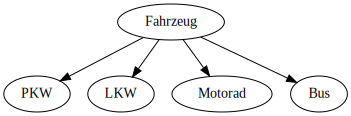

In [1]:
from graphviz import Digraph

dot = Digraph(comment = 'Class Hierarchie',format = 'png')
dot.node('B', 'Fahrzeug')
dot.node('P', 'PKW')
dot.node('L', 'LKW')
dot.node('M', 'Motorad')
dot.node('U', 'Bus')
dot.edges(['BP', 'BL','BM','BU'])
#dot.render('test-output/round-table.gv', view=True)
dot

Es gibt eine Basisklasse Fahrzeug und 4 abgeleitete Klassen. Zuerst werden die gemeinsamen Merkmale festgelegt. Ein Fahrzeug hat beispielsweise einen Hersteller, eine Farbe und eine Höchstgeschwindigkeit. 
Das sind Merkmale, die alle Fahrzeuge gemeinsam haben. 

Worin unterscheiden sich die verschiedenen Arten? Bei einem PKW gibt es verschiedene Verdecktypen. Es gibt geschlossen und offen. Es gibt unterschiedliche Bauformen je nach Anzahl der Türen: 3 Türer, 4 Türer und 5 Türer. Es gibt verschiedene Getriebeformen mit einer unterschiedlichen Anzahl an Gängen. 

Beim LKW unterscheidet man verschiedene Arten nach dem zulässigen Gesamtgewicht. LKW und Busse haben eine vorgeschriebene Höchstgeschwindigkeit. 

Motoräder werden dagegen nach Hubraum eingeteilt.

Als nächstes wird mit der Implementierung der Basisklasse begonnen.


In [17]:
class Fahrzeug:
    def __init__(self,hersteller,farbe,maxv):
        self.hersteller = hersteller
        self.farbe = farbe
        self.maxv = maxv
        self.geschwindigkeit = 0
        
    def fahren(self):
        print(f"Ich fahre {self.geschwindigkeit} km/h")
    
    def beschleunigen(self, betrag):
        if self.geschwindigkeit + betrag <= self.maxv:
            self.geschwindigkeit += betrag
        else:
            self.geschwindigkeit = maxv
            print('Schneller geht nicht')
            
    def bremsen(self, betrag):
        if self.geschwindigkeit - betrag >= 0:
            self.geschwindigkeit -= betrag
        else:
            self.geschwindigkeit = 0
            print("Alles steht")

Als nächstes wird die Klasse PKW implementiert:

In [18]:
class PKW(Fahrzeug):
    def __init__(self,hersteller,farbe,maxv,tueren,getriebe, gaenge):
        super().__init__(hersteller,farbe,maxv)
        self.tueren = tueren
        self.getriebe = getriebe
        self.gaenge = gaenge
     

Zum Testen wird eine Instanz von PKW erzeugt.

In [19]:
honda = PKW("Honda","Blau",140,3,"Automatik", 4) 

Als nächstes greifen wir auf die Methoden der Klasse Fahrzeug zurück, um den Pkw zu beschleunigen.

In [20]:
honda.beschleunigen(25)
honda.fahren()

Ich fahre 25 km/h


In [21]:
honda.bremsen(50)

Alles steht


## Zugriffsbeschränkungen
Bislang sind alle Variablen, die in den Klassen deklariert wurden, öffentlich (public).
Das bedeutet auf alle Variablen kann direkt zugegriffen werden.
Dadurch können auch Beschränkungen umgangen werden, wie die maximale Geschwindigkeit.
Der PKW Honda wurde mit einer maximalen Geschwindigkeit von 140 erzeugt. Die Methode *beschleunigen* erlaubt es nicht, diesen Wert zu überschreiten. Allerdings kann der Wert durch folgenden Code direkt gesetzt werden:

In [22]:
honda.geschwindigkeit=150

In der objektorientierten Programmierung gibt es deshalb verschiedene Level der Zugriffberechtigung. In der Regel sind dies
1. Öffentlich (eng. public)
2. Privat (eng. private)
3. Geschützt (eng. protected)
Öffentliche Attribute können von überall aufgerufen, benutzt oder geändert werden. Auf Private Variablen kann nur aus der eigenen Klasse oder aus abgeleiteten Klassen zugegriffen werden. Geschützte Attribute können ausschließlich durch die eigene Klasse verändert werden. Private Attribute werden durch einen vorangestellten Unterstrich _ gekennzeichnet, geschützte Attribute durch 2 Unterstriche __. 

In [23]:
class Fahrzeug2:
    def __init__(self,hersteller,farbe,maxv):
        self.hersteller = hersteller
        self.farbe = farbe
        self.maxv = maxv
        self._geschwindigkeit = 0
        
    def fahren(self):
        print(f"Ich fahre {self.geschwindigkeit} km/h")
    
    def beschleunigen(self, betrag):
        if self._geschwindigkeit + betrag <= self.maxv:
            self._geschwindigkeit += betrag
        else:
            self._geschwindigkeit = maxv
            print('Schneller geht nicht')
            
    def bremsen(self, betrag):
        if self._geschwindigkeit - betrag >= 0:
            self._geschwindigkeit -= betrag
        else:
            self._geschwindigkeit = 0
            print("Alles steht")
            
    def tacho_anzeigen(self):
        print(self._geschwindigkeit)
        
class PKW2(Fahrzeug2):
    
    def __init__(self,hersteller,farbe,maxv,tueren,getriebe, gaenge):
        super().__init__(hersteller,farbe,maxv)
        self.tueren = tueren
        self.getriebe = getriebe
        self.gaenge = gaenge

In der neuen Klasse Fahrzeug2 wurde nur eine Änderung vorgenommen. Aus *geschwindigkeit* wurde *_geschwindigkeit* 

In [24]:
ford = PKW2("Ford","Grün",210, 5,"Schaltung", 5)

*ford* ist eine Instanz der neuen Klasse PKW2, die von Fahrzeug2 erbt, ansonsten ist sie identisch mit PKW. 
Da *_geschwindigkeit* eine private Variable ist, kann nur noch innerhalb von Fahrzeug2 und PKW darauf zugegriffen werden. Der Versuch die Variable direkt zu lesen schlägt deshalb fehl.

In [25]:
ford.geschwindigkeit

AttributeError: 'PKW2' object has no attribute 'geschwindigkeit'

Es ist aber möglich, die Geschwindigkeit mit Hilfe der neuen Methode *tacho_anzeigen* auszulesen.

In [ ]:
ford.tacho_anzeigen()

Ebenso funktionieren die Methoden *beschleunigen* und *bremsen* weiterhin.

In [ ]:
ford.beschleunigen(45)

In [ ]:
ford.tacho_anzeigen()

Die Methoden *bremsen, beschleunigen* und *tacho_anzeigen* sind sogenannte Setter bzw. Getter Methoden. Sie stellen eine öffentliche Schnittstelle zu den nicht öffentlichen Attributen der Klasse her. Zur Verdeutlichung hier noch mal eine Beispielklasse. Die Klasse speichert einen Wert: *\_property*. Der führende Unterstrich sorgt dafür, dass es eine private Variable der Klasse ist. Von aussen lässt sich der Wert deshalb nicht direkt manipulieren. (Beachte: In Python wird diese Beschränkung nicht erzwungen, es gibt also Möglichkeiten, dies zu umgehen. In andern Sprache wie C++ oder Java wird diese Beschränkung strikt durchgesetzt)
Damit dieser Wert trotzdem von anderen Klassen benutzt und verändert werden kann, werden 2 Methoden *set_property* und *get_property* definiert. Get und set sind dabei etablierte Stichworte für solche Funktionen. Das Beispiel Fahrzeug2 zeigt aber, das dies nicht zwingend erforderlich ist.

In [1]:
class Example:
    def __init__(self):
        self._prop = "My Value"
    
    def set_property(self,value):
        self._prop=value
        
    def get_prop(self):
        return self._property

## Der Property Decorator 



In [2]:
class Example2:
    def __init__(self):
        self._prop = "My Value"
    @property    
    def prop(self):
        return self._prop
    
    @prop.setter
    def prop(self,value):
        self._prop=value
test=Example2()
test.prop

'My Value'

In [5]:
test.prop=5

In [6]:
test.prop


5